<a href="https://colab.research.google.com/github/VilchisKarla/Investigacion-de-Operaciones/blob/main/ModeloRedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Redes en Python**
*Vilchis García Karla Ivonne* - - - - - - - - - -  - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - -  - - - - - - - - - -  - - - - - - - - - -  - -04-Sep-2025

---



<font color="blue">Importamos</font> la librería para generar gráficos de redes.

In [32]:
import networkx as nx

In [33]:
H = nx.Graph() #gráfica no dirigida
G = nx.DiGraph() #gráfica dirigida

Tenemos varias maneras de <font color="blue">generar nodos</font>, sin necesidad de que haya arcos entre ellos, además la paqueteria identifica cuando un nodo existe y no lo repite

In [34]:
H.add_node(1) #agrega un solo nodo
H.add_nodes_from([1, 2])#agrega una lista de nodos

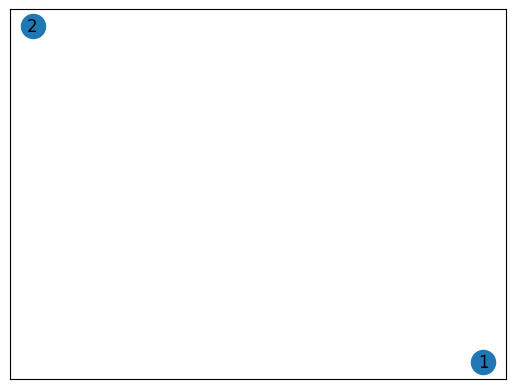

In [35]:
nx.draw_networkx(H)

<font color="blue">Creamos los arcos</font> entre cada nodo que necesitemos.

In [61]:
#agregamos los arcos para la grafica dirigida
G.add_edge('A', 'B')#agregamos los nodos en una tupla, cuando son letras van en comillas
G.add_edge('A', 'C')
G.add_edge('B', 'D')
G.add_edge('C', 'D')
G.add_edge('B', 'C')

#agregamos los graficos para la grafica no dirigida
H.add_edge(4, 5)
e = (5, 6) #a una variable le agregamos los nodos entre los que ocupamos el arco
H.add_edge(*e)  # agrega la tupla como arco
H.add_edges_from([(6, 7), (6, 8), (4,8)]) #agregamos la lista de arcos como si fueran una tupla
H.add_nodes_from("HOLA")  # agrega 4 nodos de lo que se haya escrito en comillas: 's', 'p', 'a', 'm'
H.add_edges_from([("H", "O"), ("O","L"), ("L", "A"), ("H","A")])

#Tambien tenemos la opcion de crear un diccionario y despues determinar la opcion de grafico que deseamos
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
J = nx.Graph(adjacency_dict)

Muestra el tipo de variable que es y donde se guarda

In [37]:
G

Nos muestra el gráfico

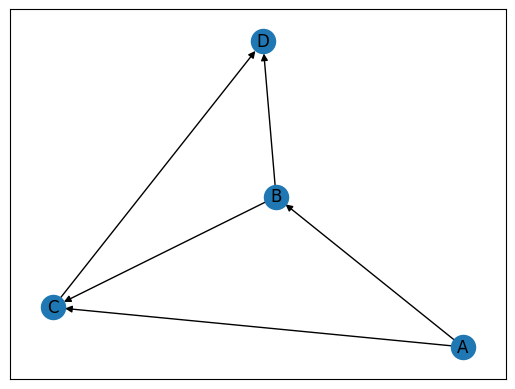

In [38]:
#en este al ser dirigido podremos observar las felchas que indican la direccion del arco
nx.draw_networkx(G)

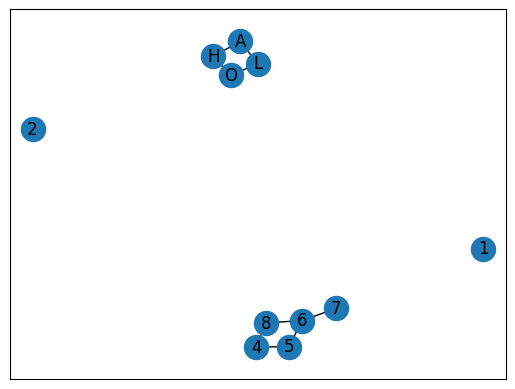

In [39]:
#en este al ser no dirigido el grafico solo mostrara los arcos como lineas basicas
nx.draw_networkx(H)

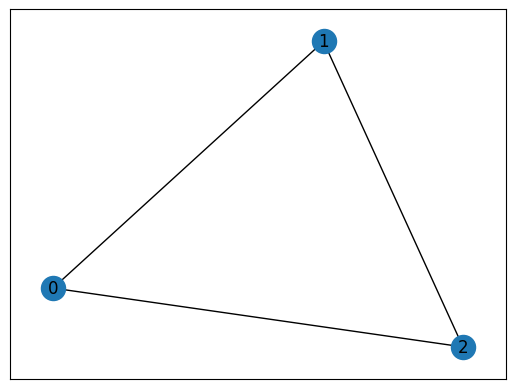

In [62]:
nx.draw_networkx(J)

**Muestra los nodos del gráfico**

In [40]:
nx.nodes(G)

NodeView(('A', 'B', 'C', 'D'))

In [41]:
nx.nodes(H)

NodeView((1, 2, 4, 5, 6, 7, 8, 'H', 'O', 'L', 'A'))

**Muestra los arcos que componen a la red**

In [42]:
nx.edges(G)

OutEdgeView([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'C'), ('C', 'D')])

In [43]:
nx.edges(H)

EdgeView([(4, 5), (4, 8), (5, 6), (6, 7), (6, 8), ('H', 'O'), ('H', 'A'), ('O', 'L'), ('L', 'A')])

**Nos genera una lista con los arcos que componen la red**

In [44]:
list(G.edges())

[('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'C'), ('C', 'D')]

In [45]:
list(H.edges())

[(4, 5),
 (4, 8),
 (5, 6),
 (6, 7),
 (6, 8),
 ('H', 'O'),
 ('H', 'A'),
 ('O', 'L'),
 ('L', 'A')]

**Muestra el número de nodos que hay en nuestra red**

In [46]:
nx.number_of_nodes(G)

4

In [47]:
nx.number_of_nodes(H)

11

**Muestra los nodos con que esta conectado el nodo [j], pero que se salen en dirección a los estos**

In [48]:
list(G.adj["B"])

['D', 'C']

In [49]:
list(H.adj[4])

[5, 8]

**Indica la cantidad de arcos que estan unidos al nodo [j]**

In [50]:
G.degree["B"]

3

In [51]:
H.degree[4]

2

**Muestra en una tupla los arcos de los correspondientes nodos**

In [52]:
G.edges(['A', 'B'])

OutEdgeDataView([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'C')])

In [53]:
H.edges([1, 4])

EdgeDataView([(4, 5), (4, 8)])

**Muestra en una tupla la cantidad de arcos de los correspondientes nodos**

In [54]:
G.degree(['A', 'B'])

DiDegreeView({'A': 2, 'B': 3})

In [55]:
H.degree([1, 4])

DegreeView({1: 0, 4: 2})

**Podemos eliminar nodos y arcos de la siguiente manera, segun sea nuestra necesidad**

In [ ]:
H.remove_node(1)
H.remove_nodes_from("HOLA")
list(H.nodes)

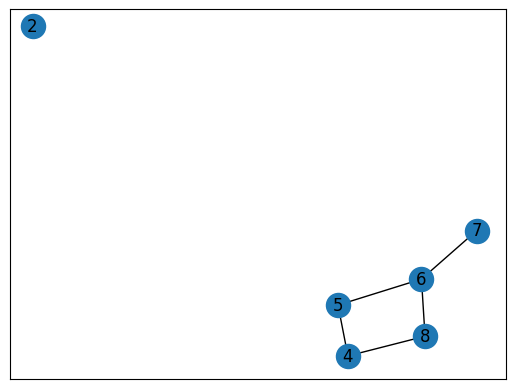

In [56]:
nx.draw_networkx(H)

In [58]:
G.remove_edge('A', 'B')

['A', 'B', 'C', 'D']

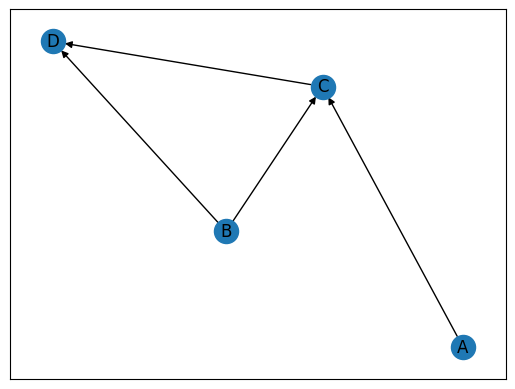

In [60]:
nx.draw_networkx(G)

**Podemos agregar atributos a borde y nodos**

In [72]:
G = nx.Graph()
G.add_weighted_edges_from([('A', 'C', 2), ('B', 'C', 4), ('B', 'D', 1.2), ('C', 'D', 5)])
for n, nbrs in G.adj.items():
   for nbr, eattr in nbrs.items():#permite acceder a lor bordes que buscamos
       wt = eattr['weight']
       if wt < 2: print(f"({n}, {nbr}, {wt:.3})")

(B, D, 1.2)
(D, B, 1.2)


In [74]:
H.add_edge(1, 2, weight=4.7 )
H.add_edges_from([(4, 5), (5, 6)], color='red')
H.add_edges_from([(6, 7, {'color': 'blue'}), (6, 8, {'weight': 8})])
H[1][2]['weight'] = 4.7
H.edges[4,8]['weight'] = 4.2

In [69]:
G.degree('B', weight='weight') #total de los atributos del nodo

5.2

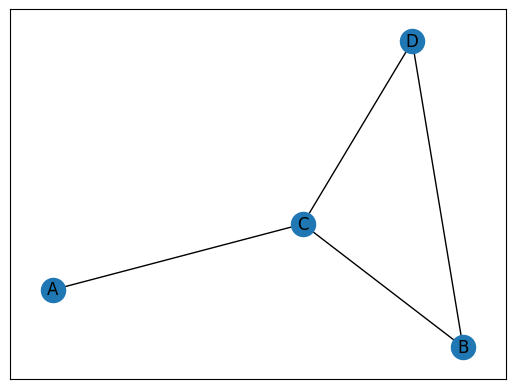

In [78]:
K = nx.Graph(G) #podemos pasar de un grafico dirigido a uno no dirigido
nx.draw_networkx(K)

## **Multigrafos**

 MultiGraph y MultiDiGraph permiten agregar la misma arista dos veces, posiblemente con diferentes datos de aristas.

In [80]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

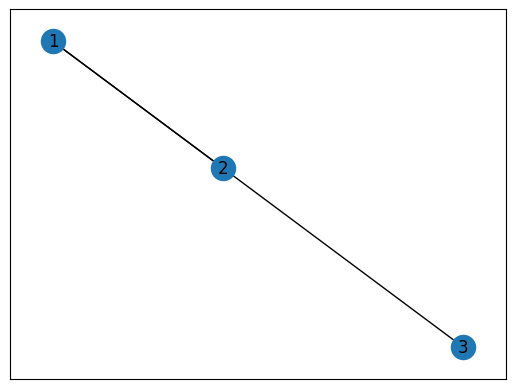

In [81]:
nx.draw_networkx(MG)

In [82]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

## **Creacion de graficos**

**Crea un grafico de n nodos conectados entre si**

In [83]:
L_5 = nx.complete_graph(5)

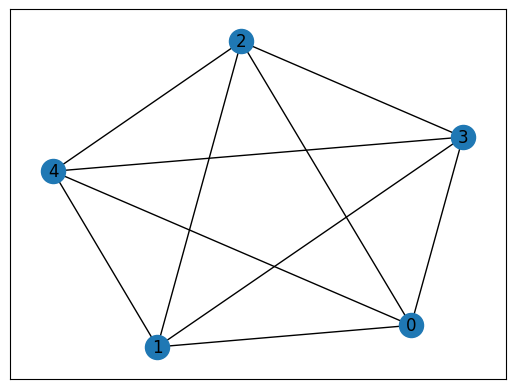

In [88]:
nx.draw_networkx(L_5)

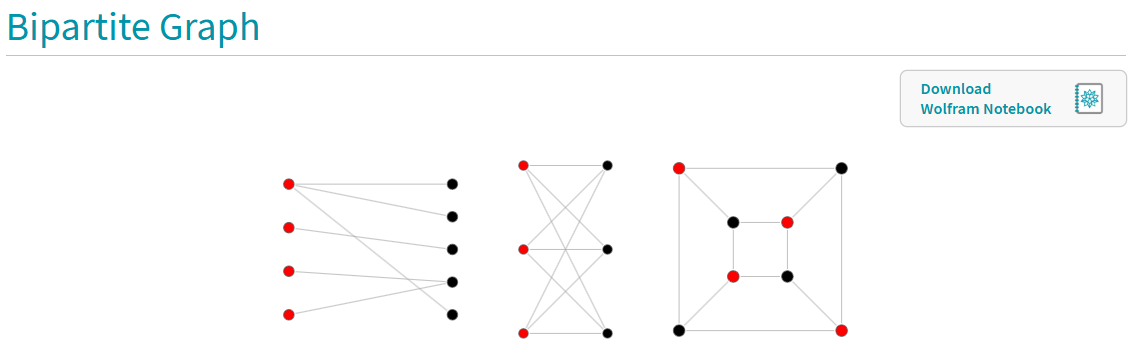

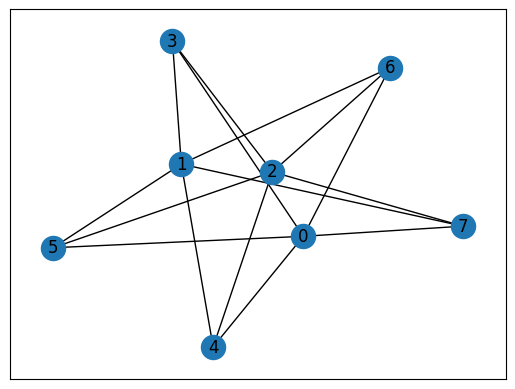

In [89]:
K_3_5 = nx.complete_bipartite_graph(3, 5)
nx.draw_networkx(K_3_5)

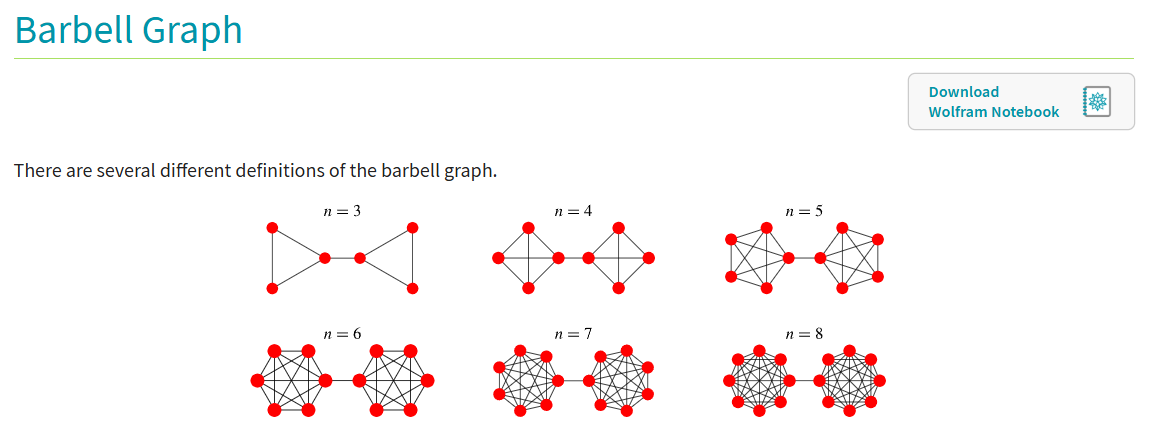

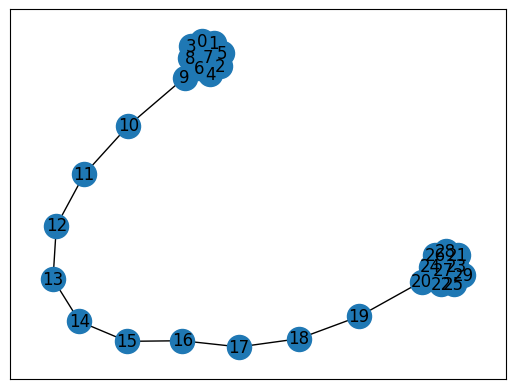

In [90]:
barbell = nx.barbell_graph(10, 10)
nx.draw_networkx(barbell)

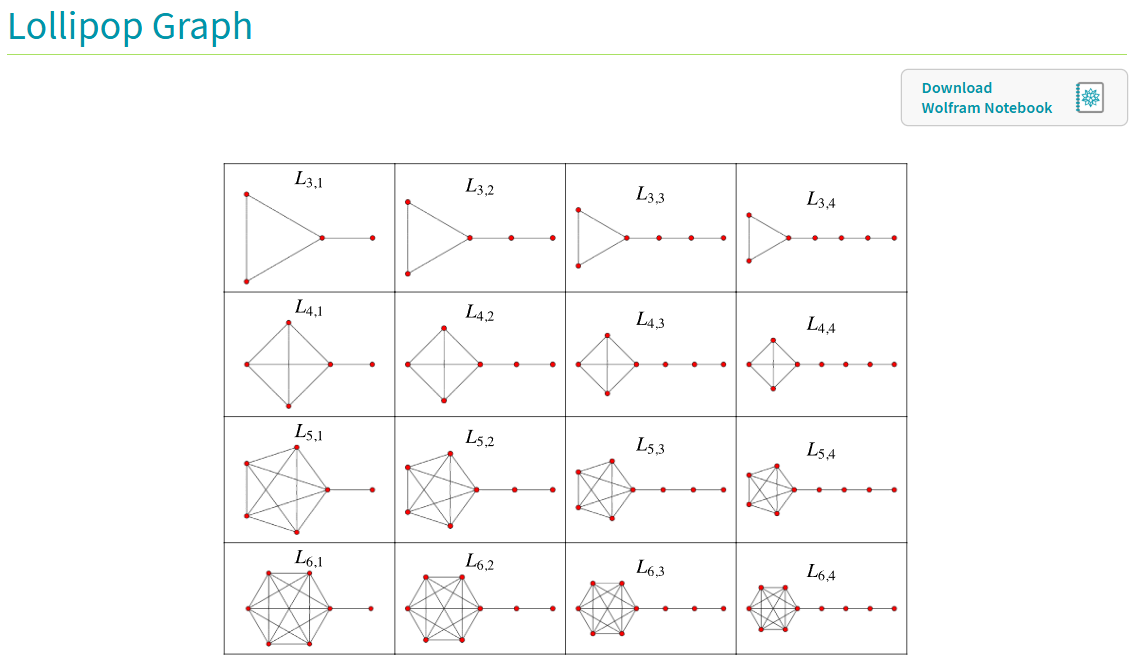

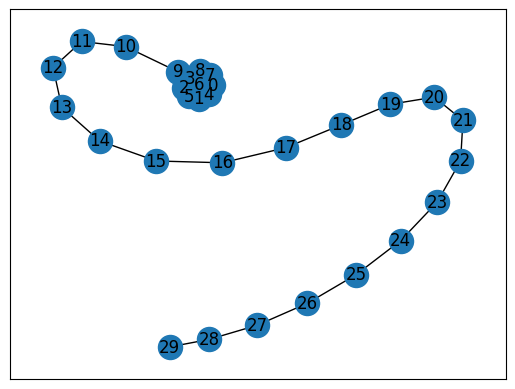

In [93]:
lollipop = nx.lollipop_graph(10, 20)
nx.draw_networkx(lollipop)

**Devuelve un $G_{n,p}$ gráfico aleatorio, también conocido como gráfico de Erdős-Rényi o gráfico binomial.**

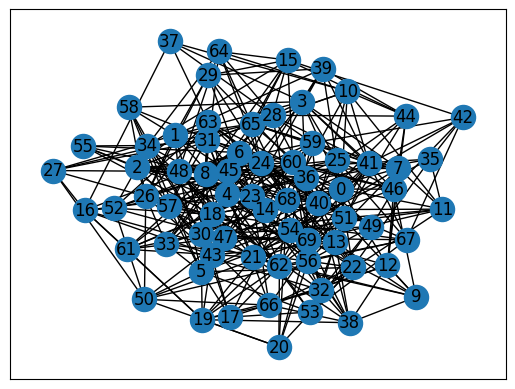

In [97]:
er = nx.erdos_renyi_graph(70, 0.15)
nx.draw_networkx(er)


**Devuelve un gráfico de mundo pequeño de Watts-Strogatz.**

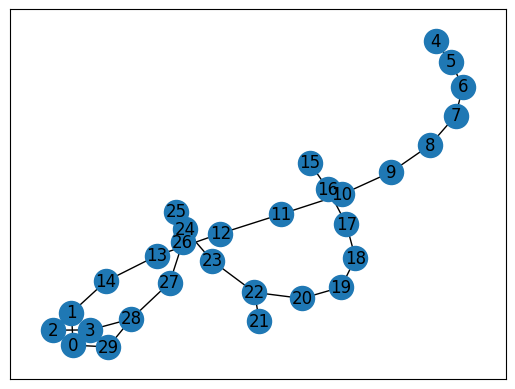

In [99]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)
nx.draw_networkx(ws)

**Devuelve un gráfico aleatorio utilizando el vínculo preferencial de Barabási-Albert**

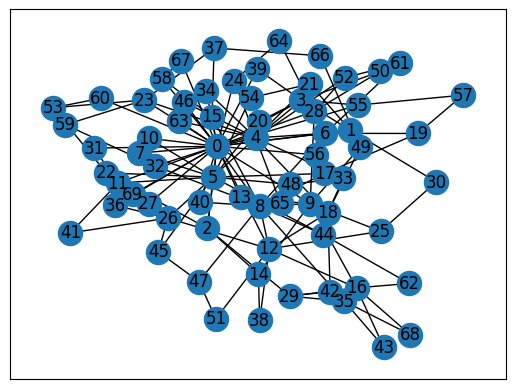

In [107]:
ba = nx.barabasi_albert_graph(70, 2)
nx.draw_networkx(ba)

**Devuelve un gráfico de langosta aleatorio.**
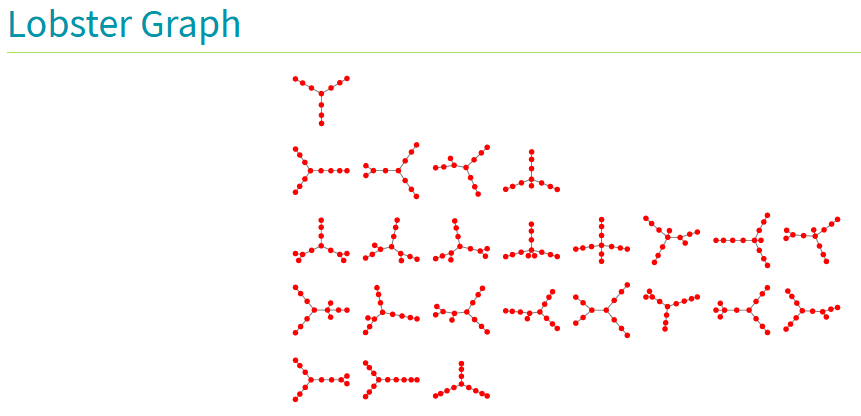

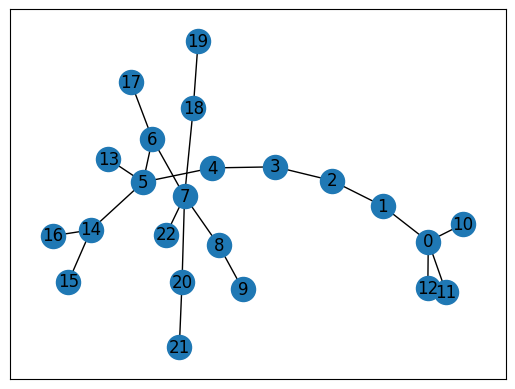

In [108]:
red = nx.random_lobster(10, 0.3, 0.3)
nx.draw_networkx(red)

\begin{array}{|l|p{10cm}|}
\hline
\textbf{Función} & \textbf{Descripción} \\
\hline
\texttt{subgraph(G, nbunch)} & \text{Devuelve  el subgrafo inducido en los nodos en nbunch. }\\
\hline
\texttt{union(G, H[, renombrar])} & \text{Combine los gráficos G y H.} \\
\hline
\texttt{disjoint_union(G, H)} & \text{Combine los gráficos G y H.} \\
\hline
\texttt{cartesian_product(G, H)} & \text{Devuelve el producto cartesiano de G y H.} \\
\hline
\texttt{compose(G, H)} & \text{Componga el gráfico G con H combinando nodos y aristas en un solo gráfico.} \\
\hline
\texttt{complement(G)} & \text{Devuelve el complemento gráfico de G.} \\
\hline
\texttt{create_empty_copy(G[, con_datos])} & \text{Devuelve una copia del gráfico G con todos los bordes eliminados.} \\
\hline
\texttt{to_undirected(gráfico)} & \text{Devuelve una vista no dirigida del gráfico graph.} \\
\hline
\texttt{to_directed(gráfico)} & \text{Devuelve una vista dirigida del gráfico graph.} \\
\hline
\end{array}

\begin{array}{|l|p{10cm}|}
\hline
\textbf{Función} & \textbf{Descripción} \\
\hline
\texttt{petersen_graph([crear_usando])} & \text{Devuelve el gráfico de Petersen.} \\
\hline
\texttt{tutte_graph([crear_usando])} & \text{Devuelve el gráfico de Tutte.} \\
\hline
\texttt{sedgewick_maze_graph([crear_usando])} & \text{Devuelve un pequeño laberinto con un ciclo.} \\
\hline
\texttt{tetrahedral_graph([crear_usando])} & \text{Devuelve el gráfico tetraédrico platónico 3-regular.} \\
\hline
\end{array}

### **Otra forma de insertar lo graficos**

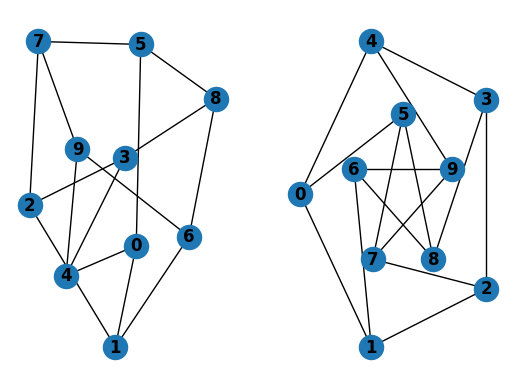

In [112]:
import matplotlib.pyplot as plt #librería de gráficos
I = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(I, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(I, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

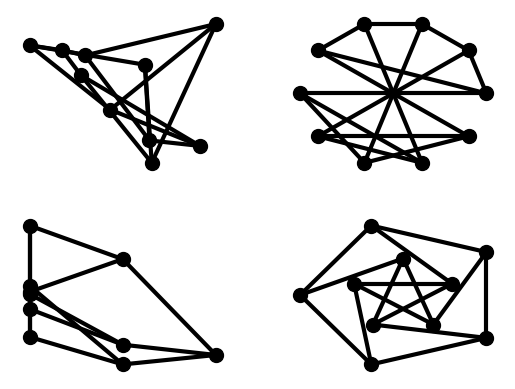

In [113]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(I, **options)
subax2 = plt.subplot(222)
nx.draw_circular(I, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(I, **options)
subax4 = plt.subplot(224)
nx.draw_shell(I, nlist=[range(5,10), range(5)], **options)